In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline


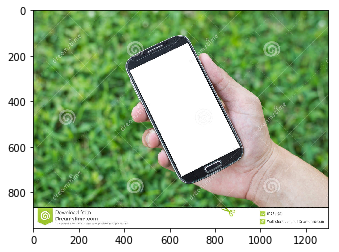

In [7]:
#Read in the image
image = cv2.imread('D:/images/d7.jpg')

#make a copy of the image
image_copy = np.copy(image)

#change color to RGB from BGR
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

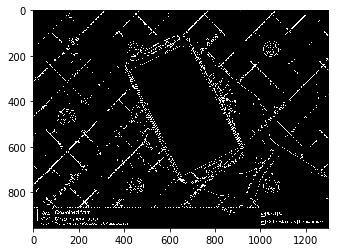

In [8]:
#PERFORM EDGE DETECTION
#convert image to gray scale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

#define our parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

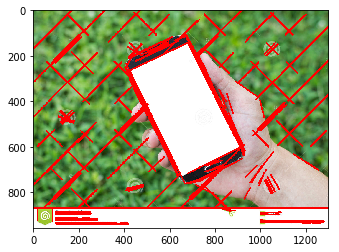

In [12]:
#FIND LINES USING A HOUGH TRANSFORM
#define the hough transform parameters
rho = 1
theta =np.pi/180
threshold = 60
min_line_length = 50
max_line_gap = 10

#find lines using a hough transform
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                       min_line_length, max_line_gap)

line_image = np.copy(image_copy)

#Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
plt.imshow(line_image)